In [47]:
# 3 Observations
# 1- The last 100 tweets for all five news outlets analyzed have an overall negative sentiment.
# 2- BBCWorld has the most negative score of the five new outlets analyzed.
# 3- Fox News has the least negative score of the five new outlets analyzed.

In [48]:
#Import Dependencies, keys, etc
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from APITweeter2 import consumer_key
from APITweeter2 import consumer_secret
from APITweeter2 import access_token
from APITweeter2 import access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [49]:
#Getting tweets and runing vader analysis
target_users = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews","@nytimes"]

outlets = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_counter = []

for target in target_users:

        public_tweets = api.user_timeline(target, count=100, result_type="recent")
        
        tweet_number = 100

        
        for tweet in public_tweets: 

            scores = analyzer.polarity_scores(tweet['text'])
            compound = scores['compound']
            pos = scores['pos']
            neu = scores['neu']
            neg = scores['neg']
            
            tweet_number -= 1
                  
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            outlets.append(target)
            tweet_counter.append(tweet_number)
            
            sentiments = {"User": outlets,
                          "Date": tweet["created_at"],
                          "Compound": compound_list,
                          "Positive": positive_list,
                          "Negative": neutral_list,
                          "Neutral": negative_list,
                         "Tweet_Count": tweet_counter}
       

In [50]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweet_Count,User
0,0.0000,Fri Mar 23 10:30:10 +0000 2018,1.000,0.000,0.0,99,@BBCWorld
1,-0.4019,Fri Mar 23 10:30:10 +0000 2018,0.722,0.278,0.0,98,@BBCWorld
2,-0.3818,Fri Mar 23 10:30:10 +0000 2018,0.658,0.342,0.0,97,@BBCWorld
3,0.0000,Fri Mar 23 10:30:10 +0000 2018,1.000,0.000,0.0,96,@BBCWorld
4,0.0000,Fri Mar 23 10:30:10 +0000 2018,1.000,0.000,0.0,95,@BBCWorld


In [51]:
sentiments_pd.to_csv('TwitterHW.csv')

In [52]:
user_sentiments = sentiments_pd.pivot(index="Tweet_Count", columns="User", values="Compound")
user_sentiments.head()

User,@BBCWorld,@CBSNews,@CNN,@FoxNews,@nytimes
Tweet_Count,,,,,
0,-0.3400,0.3400,0.0000,0.3291,0.0000
1,0.0000,-0.5994,-0.6590,0.0772,-0.5267
2,-0.5859,0.0000,0.0000,0.0772,-0.0772
3,-0.6249,-0.8720,0.0000,0.3612,-0.5574
4,0.0000,0.3400,-0.6705,0.2263,0.6369


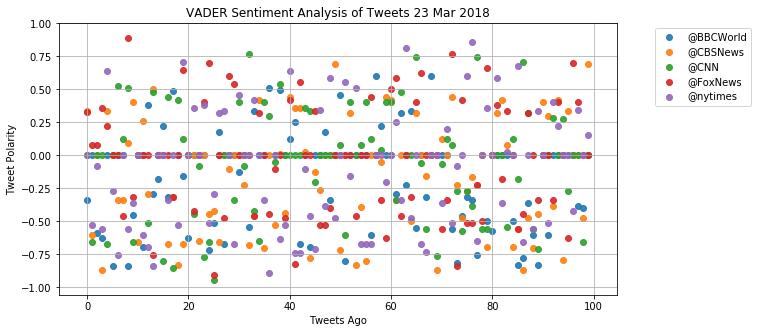

In [53]:
#Scatter Plot

x_values = np.arange(100)

fig = plt.figure(figsize=(10, 5))

for user in target_users:
    
    plt.scatter(x_values, user_sentiments[user], marker="o", alpha=0.9)


plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
now = datetime.datetime.now()
month = now.strftime("%b")
plt.title(f"VADER Sentiment Analysis of Tweets {now.day} {month} {now.year}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)

plt.savefig('TwitterHWScatter.png')

plt.show()

In [54]:
#Arrange data for bar graphs
grouped_news = sentiments_pd.groupby('User')

grouped_compound = grouped_news['Compound'].mean()


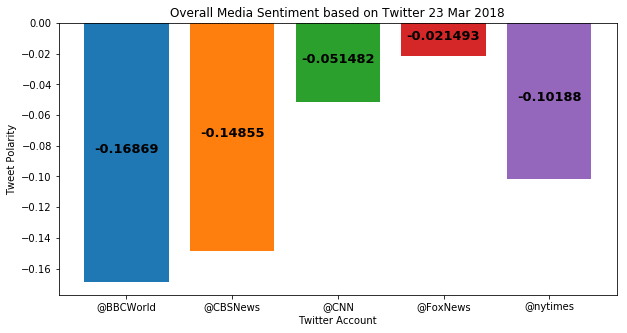

In [55]:
# Create Bar Graph
x_values = np.arange(len(target_users))

plot_data = zip(x_values, target_users)

fig = plt.figure(figsize=(10, 5))

for x, user in plot_data:
    
    y = grouped_compound[user]
    
    plt.bar(x, y)
    plt.text(x, y/2, '{:.5}'.format(y),
             horizontalalignment='center', color='black',
             fontsize=13, weight='bold')

plt.xticks(x_values, target_users)
now = datetime.datetime.now()
month = now.strftime("%b")
plt.title(f"Overall Media Sentiment based on Twitter {now.day} {month} {now.year}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Twitter Account")
plt.savefig('TwitterHWBar.png')
plt.show()